# Importing Libraries

In [108]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential

import matplotlib.pyplot as plt


In [109]:
#Distinct dataset for training and testing
prices_dataset_train =  pd.read_csv('SP500_train.csv')
prices_dataset_train.shape

(1258, 7)

In [110]:
prices_dataset_test =  pd.read_csv('SP500_test.csv')
prices_dataset_test.shape

(20, 7)

In [111]:
prices_dataset_test.head()


,date,open,high,low,close,adj_close,volume
0,2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
1,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
3,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
4,2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000


In [112]:
prices_dataset_train.head()

,date,open,high,low,close,adj_close,volume
0,03-01-2012,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
1,04-01-2012,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2,05-01-2012,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
3,06-01-2012,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
4,09-01-2012,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000


# Data Analysis

In [121]:
#Converting dtype of Date from Object to Datetime

In [113]:
prices_dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1258 non-null   object 
 1   open       1258 non-null   float64
 2   high       1258 non-null   float64
 3   low        1258 non-null   float64
 4   close      1258 non-null   float64
 5   adj_close  1258 non-null   float64
 6   volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [114]:
prices_dataset_train['date']=pd.to_datetime(prices_dataset_train['date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_9816\1934746029.py:1: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  prices_dataset_train['date']=pd.to_datetime(prices_dataset_train['date'])
C:\Users\hp\AppData\Local\Temp\ipykernel_9816\1934746029.py:1: UserWarning: Parsing '17-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  prices_dataset_train['date']=pd.to_datetime(prices_dataset_train['date'])
C:\Users\hp\AppData\Local\Temp\ipykernel_9816\1934746029.py:1: UserWarning: Parsing '18-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  prices_dataset_train['date']=pd.to_datetime(prices_dataset_train['date'])
C:\Users\hp\AppData\Local\Temp\ipykernel_9816\1934746029.py:1: UserWarning: Parsing '19-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consiste

In [115]:
prices_dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1258 non-null   datetime64[ns]
 1   open       1258 non-null   float64       
 2   high       1258 non-null   float64       
 3   low        1258 non-null   float64       
 4   close      1258 non-null   float64       
 5   adj_close  1258 non-null   float64       
 6   volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [122]:
#Datetime Index

In [116]:
prices_dataset_train=prices_dataset_train.set_index('date') #or  prices_dataset_train.index=prices_dataset_train['date']
prices_dataset_train.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2012-03-01,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
2012-04-01,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2012-05-01,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
2012-06-01,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
2012-09-01,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000


# Data Visualization

<AxesSubplot:xlabel='date'>

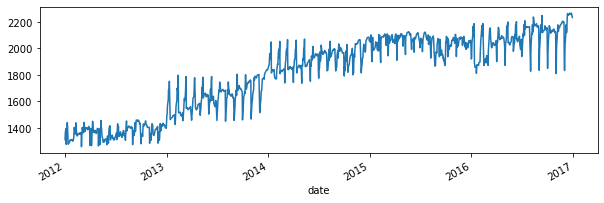

In [123]:
prices_dataset_train['low'].plot(figsize=(10,3))

In [125]:
# TIME RESAMPLING

In [126]:
prices_dataset_train.resample(rule='A').max()

,open,high,low,close,adj_close,volume
date,,,,,,
2012-12-31,1465.420044,1474.510010,1460.069946,1465.770020,1465.770020,5271490000
2013-12-31,1842.969971,1849.439941,1842.410034,1848.359985,1848.359985,5797280000
2014-12-31,2088.489990,2093.550049,2085.750000,2090.570068,2090.570068,6465530000
2015-12-31,2130.360107,2134.719971,2126.060059,2130.820068,2130.820068,6683070000
2016-12-31,2270.540039,2277.530029,2266.149902,2271.719971,2271.719971,7597450000


<AxesSubplot:xlabel='date'>

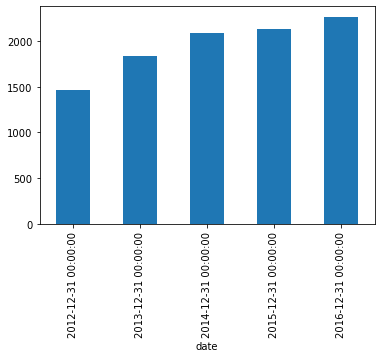

In [135]:
prices_dataset_train.resample(rule='A').max()['open'].plot(kind='bar')

<AxesSubplot:xlabel='date'>

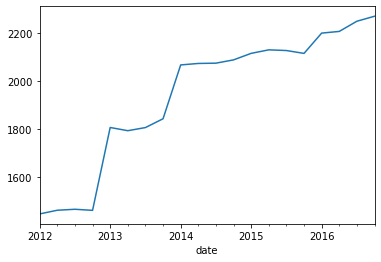

In [128]:
prices_dataset_train.resample(rule='QS').max()['open'].plot()

<AxesSubplot:xlabel='date'>

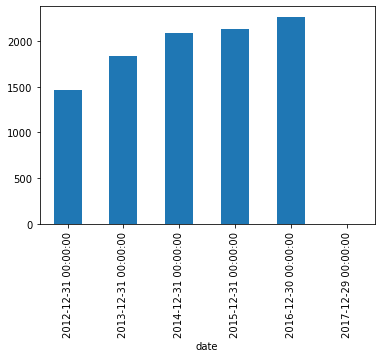

In [136]:
prices_dataset_train.resample(rule='BA').max()['open'].plot(kind='bar')

<AxesSubplot:xlabel='date'>

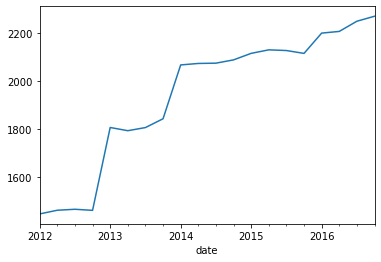

In [137]:
prices_dataset_train.resample(rule='BQS').max()['open'].plot()

<AxesSubplot:xlabel='date'>

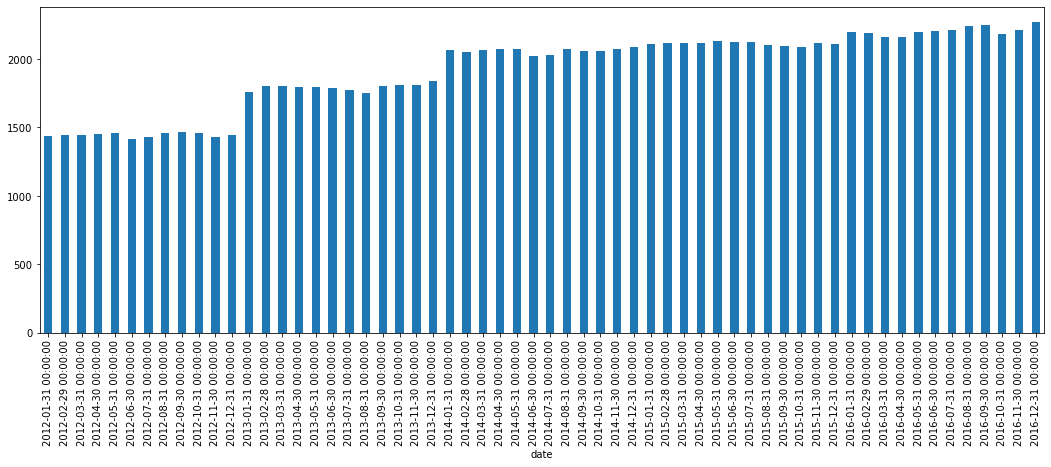

In [140]:
prices_dataset_train.resample(rule='M').max()['open'].plot(kind='bar',figsize=(18,6))